Importing the required libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# File reading
import os

Importing our scripts file (where we've put some custom functions)

In [2]:
import utilities

To read data from a BigQuery table, we need to configure BigQuery for API access and download the token file that grants permissions.

In order to do so, we need to execute the following steps:

1. Account setup
   - Create a BigQuery account ([here](https://cloud.google.com/bigquery))
   - Access the BigQuery console
   - Select the default project
   - Create a dataset
   - Create a table inside the dataset (choose the desired data source; for example CSV, Google Analytics, ...)
2. Add a dataset for this specific notebook
   - This code is based on the Google Analytics sample dataset contained in BigQuery 
   - Click on the three dots near ```Explorer``` -> Click on ```Add data```
   - Click on ```Explore the public data sources```
   - Clink on any of the sample datasets -> Click on ```View dataset```
   - A new project called ```bigquery-public-data``` will be added
   - Double-Click on ```bigquery-public-data``` -> Double-Click on the ```google-analytics-sample``` dataset -> Click on the ```ga_sessions_``` table 
   - Click on ```Copy``` -> Select the default project -> Enter the desired dataset for copying -> Enter the desired table for copying
3. Configure the BigQuery project to be accessed via API
   - Click on the left sidebar menu -> Click on ```API and Services``` -> Click on ```Credentials```
   - Click on ```Create credentials``` -> Click on ```Service account```
   - Insert the desired name (for example ```my_service_account_name```), and press ```Continue```
   - In the next screen, select ```BigQuery Admin``` in the ```role``` section
   - Click on ```Continue```, then save
   - You'll be redirected to a new page -> Scroll down on the page -> Click on the new account (for example ```my_service_account_name```)
   - Click on ```Keys``` -> Click on ```Add key``` -> Leave the default option ```JSON``` -> Confirm
   - Rename the downloaded file as ```bigquery_token.json```
   - Move the file in the same folder as this notebook

If it's the first time we run the code, we'll download the data from BigQuery and create a local copy.

In [3]:
bigQueryTokenFileName = "bigquery_token.json"
bigQueryTableId = "bigquery-public-data:google_analytics_sample.ga_sessions_20170801"

dataFileName = "data.json"

if (not os.path.exists(dataFileName)):
    df = utilities.retrieveBigQueryData(bigQueryTokenFileName, bigQueryTableId)

    # The dataset contains nested data, that can't be properly represented in a CSV, so we choose the JSON format
    df.to_json(dataFileName, orient="records")

Let's read the local copy of the data

In [4]:
df = pd.read_json(dataFileName)

Let's check the size of the data

In [5]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  2556
Columns:  16


Let's check the available columns, the types, the number of empty values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   visitorId             0 non-null      float64
 1   visitNumber           2556 non-null   int64  
 2   visitId               2556 non-null   int64  
 3   visitStartTime        2556 non-null   int64  
 4   date                  2556 non-null   int64  
 5   totals                2556 non-null   object 
 6   trafficSource         2556 non-null   object 
 7   device                2556 non-null   object 
 8   geoNetwork            2556 non-null   object 
 9   customDimensions      2556 non-null   object 
 10  hits                  2556 non-null   object 
 11  fullVisitorId         2556 non-null   float64
 12  userId                0 non-null      float64
 13  clientId              0 non-null      float64
 14  channelGrouping       2556 non-null   object 
 15  socialEngagementType 

There are 3 empty columns, related to user id. This is probably due to privacy reasons, since this is a sample dataset.

Let's drop the data.

In [7]:
df.drop(columns=["visitorId", "userId", "clientId"], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   visitNumber           2556 non-null   int64  
 1   visitId               2556 non-null   int64  
 2   visitStartTime        2556 non-null   int64  
 3   date                  2556 non-null   int64  
 4   totals                2556 non-null   object 
 5   trafficSource         2556 non-null   object 
 6   device                2556 non-null   object 
 7   geoNetwork            2556 non-null   object 
 8   customDimensions      2556 non-null   object 
 9   hits                  2556 non-null   object 
 10  fullVisitorId         2556 non-null   float64
 11  channelGrouping       2556 non-null   object 
 12  socialEngagementType  2556 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 259.7+ KB


Let's see a sample of the data

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.head(3)

,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,channelGrouping,socialEngagementType
0,1,1501583974,1501583974,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Car...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2.248282e+18,Organic Search,Not Socially Engaged
1,1,1501616585,1501616585,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",8.647436e+18,Organic Search,Not Socially Engaged
2,1,1501583344,1501583344,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2.055840e+18,Organic Search,Not Socially Engaged


We see some peculiar features of the data:

1. the date column has an improper format
2. some columns contain nested objects
3. some columns contain lists

Let's deal with number 1, the date column format. 

Let's check all the different values in the column, to see whether all data is in the same format

In [11]:
df.date.unique()

array([20170801], dtype=int64)

All data is in the same format, stored as integers.

Let's first transform the data from numbers to strings, and then format the strings by adding ```-``` to separate years, months, days.

In [12]:
df.date = df.date.map(lambda val: str(val)).map(lambda val: val[0:4] + "-" + val[4:6] + "-" + val[6:8])

Let's display a sample of the formatted dates.

In [13]:
df[["date"]].head()

,date
0,2017-08-01
1,2017-08-01
2,2017-08-01
3,2017-08-01
4,2017-08-01


Let's work on number 2, the columns with nested object data.

Let's display a sample of these columns.

In [14]:
objCols = utilities.getListOfObjectColumns(df)
df[objCols]

,totals,trafficSource,device,geoNetwork
0,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Car..."
1,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor..."
2,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther..."
3,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'Weste..."
4,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor..."
...,...,...,...,...
2551,"{'visits': 1, 'hits': 11, 'pageviews': 7, 'tim...","{'referralPath': '/pin/714242822122965250', 'c...","{'browser': 'Safari (in-app)', 'browserVersion...","{'continent': 'Americas', 'subContinent': 'Nor..."
2552,"{'visits': 1, 'hits': 12, 'pageviews': 9, 'tim...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor..."
2553,"{'visits': 1, 'hits': 14, 'pageviews': 8, 'tim...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor..."
2554,"{'visits': 1, 'hits': 14, 'pageviews': 11, 'ti...","{'referralPath': '/yt/about/', 'campaign': '(n...","{'browser': 'Edge', 'browserVersion': 'not ava...","{'continent': 'Americas', 'subContinent': 'Sou..."


Let's extract the nested data.

For each of these columns, we'll read which properties are contained in the objects, and we'll create a new column for every object property. We'll then remove the original column.

Some objects contain other objects inside, so we'll iterate this extraction process until there are no more nested object columns.

In [15]:
# Iterate the extraction process until there are no more object-type columns
while (len(objCols) > 0):

    # For each nested column, use the utilities function to extract the data in new columns, and delete the original column
    for col in objCols:
        print("Column from which we're extracting data:", col)

        print("Sample of the original data")
        display(df[[col]].head(3))

        print("Sample of the extracted data")
        utilities.extractNestedObjectData(df, col)
        extractedCols = [newcol for newcol in df.columns if newcol.startswith(col)]
        display(df[extractedCols].head(3))
        
        print()
    
    # After the extraction process is complete, check if there are new object columns that have been extracted
    objCols = utilities.getListOfObjectColumns(df)

Column from which we're extracting data: totals
Sample of the original data


,totals
0,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time..."
1,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time..."
2,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time..."


Sample of the extracted data


,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_bounces,totals_transactions,totals_transactionRevenue,totals_newVisits,totals_screenviews,totals_uniqueScreenviews,totals_timeOnScreen,totals_totalTransactionRevenue,totals_sessionQualityDim
0,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1
1,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1
2,1,1,1,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1



Column from which we're extracting data: trafficSource
Sample of the original data


,trafficSource
0,"{'referralPath': None, 'campaign': '(not set)'..."
1,"{'referralPath': None, 'campaign': '(not set)'..."
2,"{'referralPath': None, 'campaign': '(not set)'..."


Sample of the extracted data


,trafficSource_referralPath,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adContent,trafficSource_adwordsClickInfo,trafficSource_isTrueDirect,trafficSource_campaignCode
0,None,(not set),(direct),(none),None,None,"{'campaignId': None, 'adGroupId': None, 'creat...",None,None
1,None,(not set),(direct),(none),None,None,"{'campaignId': None, 'adGroupId': None, 'creat...",None,None
2,None,(not set),(direct),(none),None,None,"{'campaignId': None, 'adGroupId': None, 'creat...",None,None



Column from which we're extracting data: device
Sample of the original data


,device
0,"{'browser': 'Chrome', 'browserVersion': 'not a..."
1,"{'browser': 'Chrome', 'browserVersion': 'not a..."
2,"{'browser': 'Chrome', 'browserVersion': 'not a..."


Sample of the extracted data


,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_javaEnabled,device_language,device_screenColors,device_screenResolution,device_deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,None,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile



Column from which we're extracting data: geoNetwork
Sample of the original data


,geoNetwork
0,"{'continent': 'Americas', 'subContinent': 'Car..."
1,"{'continent': 'Americas', 'subContinent': 'Nor..."
2,"{'continent': 'Asia', 'subContinent': 'Souther..."


Sample of the extracted data


,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation
0,Americas,Caribbean,St. Lucia,(not set),(not set),(not set),not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Asia,Southern Asia,India,Delhi,(not set),New Delhi,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset



Column from which we're extracting data: trafficSource_adwordsClickInfo
Sample of the original data


,trafficSource_adwordsClickInfo
0,"{'campaignId': None, 'adGroupId': None, 'creat..."
1,"{'campaignId': None, 'adGroupId': None, 'creat..."
2,"{'campaignId': None, 'adGroupId': None, 'creat..."


Sample of the extracted data


,trafficSource_adwordsClickInfo_campaignId,trafficSource_adwordsClickInfo_adGroupId,trafficSource_adwordsClickInfo_creativeId,trafficSource_adwordsClickInfo_criteriaId,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_criteriaParameters,trafficSource_adwordsClickInfo_gclId,trafficSource_adwordsClickInfo_customerId,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_targetingCriteria,trafficSource_adwordsClickInfo_isVideoAd
0,None,None,None,None,NaN,None,not available in demo dataset,None,None,None,None,None
1,None,None,None,None,NaN,None,not available in demo dataset,None,None,None,None,None
2,None,None,None,None,NaN,None,not available in demo dataset,None,None,None,None,None



Column from which we're extracting data: trafficSource_adwordsClickInfo_targetingCriteria
Sample of the original data


,trafficSource_adwordsClickInfo_targetingCriteria
0,None
1,None
2,None


Sample of the extracted data


,trafficSource_adwordsClickInfo_targetingCriteria_boomUserlistId
0,None
1,None
2,None


Let's see the new size of the dataset

In [16]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  2556
Columns:  70


Let's check which columns are empty, and remove them

In [17]:
emptycols = []
for col in df.columns:
    if (df[col].isna().all()):
        emptycols.append(col)
print("Empty columns:", emptycols)

Empty columns: ['totals_screenviews', 'totals_uniqueScreenviews', 'totals_timeOnScreen', 'trafficSource_adwordsClickInfo_campaignId', 'trafficSource_adwordsClickInfo_adGroupId', 'trafficSource_adwordsClickInfo_creativeId', 'trafficSource_adwordsClickInfo_criteriaId', 'trafficSource_adwordsClickInfo_customerId', 'trafficSource_adwordsClickInfo_targetingCriteria_boomUserlistId', 'trafficSource_campaignCode', 'device_javaEnabled']


In [18]:
df.drop(columns=emptycols, inplace=True)

In [19]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  2556
Columns:  59


Let's print a sample of the formatted dataset

In [20]:
df.head()

,visitNumber,visitId,visitStartTime,date,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_bounces,totals_transactions,totals_transactionRevenue,totals_newVisits,totals_totalTransactionRevenue,totals_sessionQualityDim,trafficSource_referralPath,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adContent,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_criteriaParameters,trafficSource_adwordsClickInfo_gclId,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_isTrueDirect,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,customDimensions,hits,fullVisitorId,channelGrouping,socialEngagementType
0,1,1501583974,1501583974,2017-08-01,1,1,1,NaN,1.0,NaN,NaN,1.0,NaN,1,None,(not set),(direct),(none),None,None,NaN,None,not available in demo dataset,None,None,None,None,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Caribbean,St. Lucia,(not set),(not set),(not set),not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,[],"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2.248282e+18,Organic Search,Not Socially Engaged
1,1,1501616585,1501616585,2017-08-01,1,1,1,NaN,1.0,NaN,NaN,1.0,NaN,1,None,(not set),(direct),(none),None,None,NaN,None,not available in demo dataset,None,None,None,None,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,"[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",8.647436e+18,Organic Search,Not Socially Engaged
2,1,1501583344,1501583344,2017-08-01,1,1,1,NaN,1.0,NaN,NaN,1.0,NaN,1,None,(not set),(direct),(none),None,None,NaN,None,not available in demo dataset,None,None,None,None,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Asia,Southern Asia,India,Delhi,(not set),New Delhi,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,"[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2.055840e+18,Organic Search,Not Socially En

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 59 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   visitNumber                                        2556 non-null   int64  
 1   visitId                                            2556 non-null   int64  
 2   visitStartTime                                     2556 non-null   int64  
 3   date                                               2556 non-null   object 
 4   totals_visits                                      2556 non-null   int64  
 5   totals_hits                                        2556 non-null   int64  
 6   totals_pageviews                                   2556 non-null   int64  
 7   totals_timeOnSite                                  1310 non-null   float64
 8   totals_bounces                                     1238 non-null   float64
 9   totals_t

Let's move on to number 3, handling the data in the array-type columns.

Let's check a sample of these columns

In [22]:
arrayCols = utilities.getListOfArrayColumns(df)
df[arrayCols].head()

,customDimensions,hits
0,[],"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut..."
1,"[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu..."
2,"[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut..."
3,"[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minut..."
4,"[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minu..."


Let's see the minimum and maximum possible values contained in an array for each of these columns

In [23]:
for col in arrayCols:
    print("Column:", col)
    numberOfArrayItemsPerCell = df[col].map(lambda list: 0 if list == None else len(list))
    print("Minimum number of array items in a cell:", numberOfArrayItemsPerCell.min())
    print("Maximum number of array items in a cell:", numberOfArrayItemsPerCell.max())
    print()

Column: customDimensions
Minimum number of array items in a cell: 0
Maximum number of array items in a cell: 1

Column: hits
Minimum number of array items in a cell: 1
Maximum number of array items in a cell: 302



Each cell in the ```customDimensions``` column contains either 0 or 1 object value, so we can simply extract the object in each cell.

In [24]:
df.customDimensions = df.customDimensions.map(lambda list: None if (list == None or len(list) == 0) else list[0])

In [25]:
df[["customDimensions"]].head()

,customDimensions
0,None
1,"{'index': 4, 'value': 'North America'}"
2,"{'index': 4, 'value': 'APAC'}"
3,"{'index': 4, 'value': 'EMEA'}"
4,"{'index': 4, 'value': 'North America'}"


Now we can repeate the same extraction process.

In [26]:
utilities.extractNestedObjectData(df, "customDimensions")

Let's check a sample of the newly extracted columns.

In [27]:
df[[col for col in df.columns if col.startswith("customDimensions")]].head()

,customDimensions_index,customDimensions_value
0,NaN,None
1,4.0,North America
2,4.0,APAC
3,4.0,EMEA
4,4.0,North America


For the ```hits``` column we'll need to export the data to a separate dataset, otherwise to extract it we'd multiply the number of rows in the original dataset.

Let's add an ID column to the base dataset, that we can later use as a primary key to be referenced in the hits dataset.

In [28]:
df = df.reset_index().rename(columns={"index": "id"})
df.head()

,id,visitNumber,visitId,visitStartTime,date,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_bounces,totals_transactions,totals_transactionRevenue,totals_newVisits,totals_totalTransactionRevenue,totals_sessionQualityDim,trafficSource_referralPath,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adContent,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_criteriaParameters,trafficSource_adwordsClickInfo_gclId,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_isTrueDirect,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,customDimensions_index,customDimensions_value,hits,fullVisitorId,channelGrouping,socialEngagementType
0,0,1,1501583974,1501583974,2017-08-01,1,1,1,NaN,1.0,NaN,NaN,1.0,NaN,1,None,(not set),(direct),(none),None,None,NaN,None,not available in demo dataset,None,None,None,None,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Caribbean,St. Lucia,(not set),(not set),(not set),not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,NaN,None,"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2.248282e+18,Organic Search,Not Socially Engaged
1,1,1,1501616585,1501616585,2017-08-01,1,1,1,NaN,1.0,NaN,NaN,1.0,NaN,1,None,(not set),(direct),(none),None,None,NaN,None,not available in demo dataset,None,None,None,None,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,4.0,North America,"[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",8.647436e+18,Organic Search,Not Socially Engaged
2,2,1,1501583344,1501583344,2017-08-01,1,1,1,NaN,1.0,NaN,NaN,1.0,NaN,1,None,(not set),(direct),(none),None,None,NaN,None,not available in demo dataset,None,None,None,None,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Asia,Southern Asia,India,Delhi,(not set),New Delhi,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,4.0,APAC,"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",2.055840e+18,Organic Search,Not Socially Engaged


Let's create the hits dataset, by extracting the ID and hits columns from the base dataset.

In [29]:
hitsdf = df[["id", "hits"]].rename(columns={"id": "session_id"})
hitsdf.head()

,session_id,hits
0,0,"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut..."
1,1,"[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu..."
2,2,"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut..."
3,3,"[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minut..."
4,4,"[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minu..."


Let's drop the hits column from the base dataset.

In [30]:
df.drop(columns="hits", inplace=True)

Now that we've flattened and formatted the base dataset, let's perform further exploration.

Let's display some descriptive statistics.

In [31]:
print("Quantitative columns:")
display(df.describe())

print("\nQualitative columns:")
display(df.describe(include=object))

Quantitative columns:


,id,visitNumber,visitId,visitStartTime,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_bounces,totals_transactions,totals_transactionRevenue,totals_newVisits,totals_totalTransactionRevenue,totals_sessionQualityDim,trafficSource_adwordsClickInfo_page,customDimensions_index,fullVisitorId
count,2556.000000,2556.000000,2.556000e+03,2.556000e+03,2556.0,2556.000000,2556.000000,1310.000000,1238.0,43.000000,4.300000e+01,1872.0,4.300000e+01,2556.000000,58.0,2210.0,2.556000e+03
mean,1277.500000,2.661189,1.501614e+09,1.501614e+09,1.0,5.177230,4.279734,325.051908,1.0,1.046512,1.931381e+08,1.0,2.067442e+08,5.832942,1.0,4.0,4.549451e+18
std,737.997967,12.022200,2.280455e+04,2.280423e+04,0.0,11.816349,7.966343,592.411724,0.0,0.213083,4.787008e+08,0.0,4.785247e+08,16.463750,0.0,0.0,3.107969e+18
min,0.000000,1.000000,1.501570e+09,1.501571e+09,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.990000e+06,1.0,2.990000e+06,1.000000,1.0,4.0,3.458418e+15
25%,638.750000,1.000000,1.501597e+09,1.501597e+09,1.0,1.000000,1.000000,32.000000,1.0,1.000000,2.918500e+07,1.0,3.439500e+07,1.000000,1.0,4.0,1.627093e+18
50%,1277.500000,1.000000,1.501614e+09,1.501614e+09,1.0,2.000000,2.000000,96.500000,1.0,1.000000,4.567000e+07,1.0,5.079000e+07,1.000000,1.0,4.0,4.466389e+18
75%,1916.250000,2.000000,1.501632e+09,1.501632e+09,1.0,5.000000,4.000000,336.750000,1.0,1.000000,1.509150e+08,1.0,1.695200e+08,1.000000,1.0,4.0,7.350971e+18
max,2555.000000,326.000000,1.501657e+09,1.501657e+09,1.0,302.000000,155.000000,5455.000000,1.0,2.000000,2.933610e+09,1.0,2.935610e+09,95.000000,1.0,4.0,9.997536e+18



Qualitative columns:


,date,trafficSource_referralPath,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adContent,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_criteriaParameters,trafficSource_adwordsClickInfo_gclId,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_isTrueDirect,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,customDimensions_value,channelGrouping,socialEngagementType
count,2556,649,2556,2556,2556,5,12,58,2556,58,58,58,872,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2210,2556,2556
unique,1,88,2,35,5,3,2,1,1,52,1,1,1,15,1,1,9,1,1,1,1,1,1,1,1,1,1,3,6,19,94,42,19,56,1,524,1,1,1,5,7,1
top,2017-08-01,/,(not set),(direct),(none),(not provided),Display Ad created 3/11/14,Top,not available in demo dataset,CjwKCAjwzYDMBRA1EiwAwCv6Jt0kCNNM8qAVQ6PaGsphV9...,Google Search,False,True,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,North America,Organic Search,Not Socially Engaged
freq,2556,330,2504,2166,2166,3,11,58,2556,4,58,58,872,1900,2556,2556,834,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,1742,1472,1372,1287,1388,1388,1388,2556,1003,2556,2556,2556,1372,1346,2556


By observing the data, we can identify some columns of little interest from an analytics standpoint.

Let's remove them.

In [32]:
colsToDelete = [
    "visitNumber", "visitId", "visitStartTime", "totals_visits", "totals_bounces", "totals_transactions", 
    "totals_transactionRevenue", "totals_newVisits", "totals_totalTransactionRevenue", "totals_sessionQualityDim",
    "customDimensions_index", "customDimensions_value", "trafficSource_adwordsClickInfo_gclId",
    "device_browserSize", "device_mobileDeviceBranding", "device_mobileInputSelector", "device_mobileDeviceMarketingName",
    "device_flashVersion", "device_isMobile", "device_mobileDeviceInfo", "device_screenColors", "device_screenResolution", "geoNetwork_latitude", "geoNetwork_longitude",
    "geoNetwork_networkLocation", "trafficSource_adwordsClickInfo_page"
]
df.drop(columns=colsToDelete, inplace=True)

In [33]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  2556
Columns:  34


Let's print again the statistics now that we have fewer data to get a clearer picture

In [34]:
print("Quantitative columns:")
display(df.describe())

print("\nQualitative columns:")
display(df.describe(include=object))

Quantitative columns:


,id,totals_hits,totals_pageviews,totals_timeOnSite,fullVisitorId
count,2556.000000,2556.000000,2556.000000,1310.000000,2.556000e+03
mean,1277.500000,5.177230,4.279734,325.051908,4.549451e+18
std,737.997967,11.816349,7.966343,592.411724,3.107969e+18
min,0.000000,1.000000,1.000000,1.000000,3.458418e+15
25%,638.750000,1.000000,1.000000,32.000000,1.627093e+18
50%,1277.500000,2.000000,2.000000,96.500000,4.466389e+18
75%,1916.250000,5.000000,4.000000,336.750000,7.350971e+18
max,2555.000000,302.000000,155.000000,5455.000000,9.997536e+18



Qualitative columns:


,date,trafficSource_referralPath,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adContent,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_criteriaParameters,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_isTrueDirect,device_browser,device_browserVersion,device_operatingSystem,device_operatingSystemVersion,device_mobileDeviceModel,device_language,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,channelGrouping,socialEngagementType
count,2556,649,2556,2556,2556,5,12,58,2556,58,58,872,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556
unique,1,88,2,35,5,3,2,1,1,1,1,1,15,1,9,1,1,1,3,6,19,94,42,19,56,1,524,7,1
top,2017-08-01,/,(not set),(direct),(none),(not provided),Display Ad created 3/11/14,Top,not available in demo dataset,Google Search,False,True,Chrome,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),Organic Search,Not Socially Engaged
freq,2556,330,2504,2166,2166,3,11,58,2556,58,58,872,1900,2556,834,2556,2556,2556,1742,1472,1372,1287,1388,1388,1388,2556,1003,1346,2556


Let's plot the numerical data

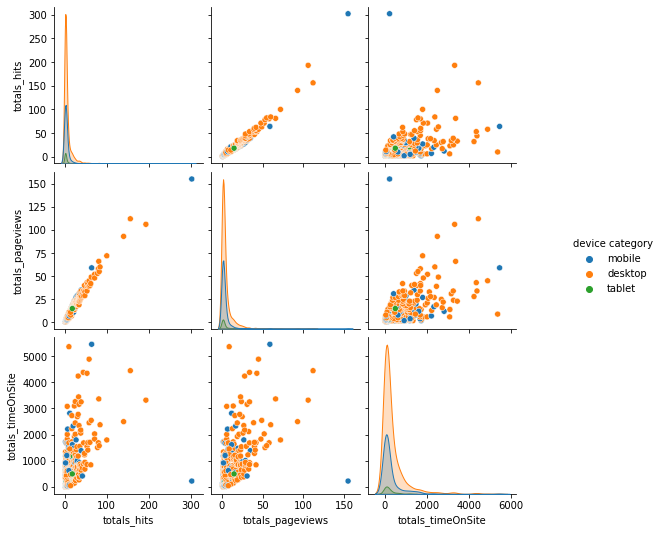

In [35]:
# It's useless to plot the ID columns
numericalDataToExcludeFromPlotting = ["id", "fullVisitorId"]

pairplot = sns.pairplot(df.drop(columns=numericalDataToExcludeFromPlotting), hue="device_deviceCategory")
pairplot._legend.set_title("device category")
plt.show()

Let's plot how the numerical columns are correlated with each other

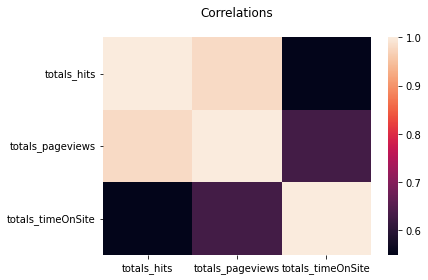

In [36]:
plt.title("Correlations\n")
sns.heatmap(df.drop(columns=numericalDataToExcludeFromPlotting).select_dtypes(include=np.number).corr())
plt.show()

Let's explore the categorical data.

First, let's see how the different types of user devices are distributed.

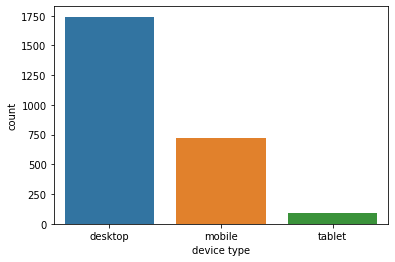

In [37]:
ax = sns.countplot(data=df, x="device_deviceCategory", order=df.device_deviceCategory.value_counts().index)
ax.set(xlabel="device type")
plt.show()

Let's see how the time spent by the user on the site relates to the device type. We'd expect longer average stay time on desktop devices.

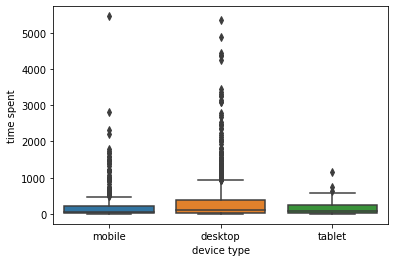

In [38]:
ax = sns.boxplot(data=df, x="device_deviceCategory", y="totals_timeOnSite")
ax.set(xlabel="device type", ylabel="time spent")
plt.show()

Let's check the most common regions

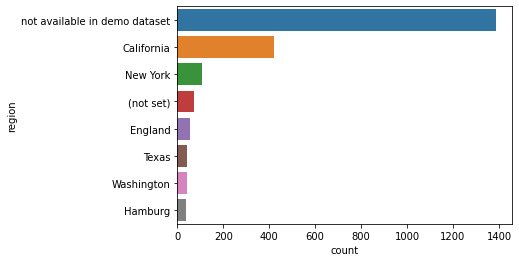

In [39]:
# To avoid a cluttered plot with too much data
numItemsToShow = 8

ax = sns.countplot(data=df, y="geoNetwork_region", order=df.geoNetwork_region.value_counts()[:numItemsToShow].index)
ax.set(ylabel="region", xlabel="count")
plt.show()

Let's explore the hits dataset

In [40]:
print("Rows: ", hitsdf.shape[0])
print("Columns: ", hitsdf.shape[1])

Rows:  2556
Columns:  2


In [41]:
hitsdf.head()

,session_id,hits
0,0,"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut..."
1,1,"[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu..."
2,2,"[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut..."
3,3,"[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minut..."
4,4,"[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minu..."


Let's extract the objects in each array cell. Starting from the original hits dataset, for each original row, we'll create X rows (one for every one of the X objects contained in the hits cell of the row).

In [42]:
hitsdf = pd.merge(hitsdf.session_id, hitsdf.hits.explode(), left_index=True, right_index=True)
hitsdf.head()

,session_id,hits
0,0,"{'hitNumber': 1, 'time': 0, 'hour': 3, 'minute..."
1,1,"{'hitNumber': 1, 'time': 0, 'hour': 12, 'minut..."
2,2,"{'hitNumber': 1, 'time': 0, 'hour': 3, 'minute..."
3,3,"{'hitNumber': 1, 'time': 0, 'hour': 0, 'minute..."
4,4,"{'hitNumber': 1, 'time': 0, 'hour': 22, 'minut..."


Let's see how many rows we have now

In [43]:
print("Rows: ", hitsdf.shape[0])
print("Columns: ", hitsdf.shape[1])

Rows:  13233
Columns:  2


Let's extract the nested data in every object of the hits column, using the same process as before

In [44]:
objCols = utilities.getListOfObjectColumns(hitsdf)
while (len(objCols) > 0):
    for col in objCols:
        utilities.extractNestedObjectData(hitsdf, col)
    objCols = utilities.getListOfObjectColumns(hitsdf)

hitsdf.head()

,session_id,hits_hitNumber,hits_time,hits_hour,hits_minute,hits_isSecure,hits_isInteraction,hits_isEntrance,hits_isExit,hits_referer,hits_page_pagePath,hits_page_hostname,hits_page_pageTitle,hits_page_searchKeyword,hits_page_searchCategory,hits_page_pagePathLevel1,hits_page_pagePathLevel2,hits_page_pagePathLevel3,hits_page_pagePathLevel4,hits_transaction_transactionId,hits_transaction_transactionRevenue,hits_transaction_transactionTax,hits_transaction_transactionShipping,hits_transaction_affiliation,hits_transaction_currencyCode,hits_transaction_localTransactionRevenue,hits_transaction_localTransactionTax,hits_transaction_localTransactionShipping,hits_transaction_transactionCoupon,hits_item_transactionId,hits_item_productName,hits_item_productCategory,hits_item_productSku,hits_item_itemQuantity,hits_item_itemRevenue,hits_item_currencyCode,hits_item_localItemRevenue,hits_contentInfo,hits_appInfo_name,hits_appInfo_version,hits_appInfo_id,hits_appInfo_installerId,hits_appInfo_appInstallerId,hits_appInfo_appName,hits_appInfo_appVersion,hits_appInfo_appId,hits_appInfo_screenName,hits_appInfo_landingScreenName,hits_appInfo_exitScreenName,hits_appInfo_screenDepth,hits_exceptionInfo_description,hits_exceptionInfo_isFatal,hits_exceptionInfo_exceptions,hits_exceptionInfo_fatalExceptions,hits_eventInfo,hits_product,hits_promotion,hits_promotionActionInfo_promoIsView,hits_promotionActionInfo_promoIsClick,hits_refund,hits_eCommerceAction_action_type,hits_eCommerceAction_step,hits_eCommerceAction_option,hits_experiment,hits_publisher,hits_customVariables,hits_customDimensions,hits_customMetrics,hits_type,hits_social_socialInteractionNetwork,hits_social_socialInteractionAction,hits_social_socialInteractions,hits_social_socialInteractionTarget,hits_social_socialNetwork,hits_social_uniqueSocialInteractions,hits_social_hasSocialSourceReferral,hits_social_socialInteractionNetworkAction,hits_latencyTracking,hits_sourcePropertyInfo,hits_contentGroup_contentGroup1,hits_contentGroup_contentGroup2,hits_contentGroup_contentGroup3,hits_contentGroup_contentGroup4,hits_contentGroup_contentGroup5,hits_contentGroup_previousContentGroup1,hits_contentGroup_previousContentGroup2,hits_contentGroup_previousContentGroup3,hits_contentGroup_previousContentGroup4,hits_contentGroup_previousContentGroup5,hits_contentGroup_contentGroupUniqueViews1,hits_contentGroup_contentGroupUniqueViews2,hits_contentGroup_contentGroupUniqueViews3,hits_contentGroup_contentGroupUniqueViews4,hits_contentGroup_contentGroupUniqueViews5,hits_dataSource,hits_publisher_infos
0,0,1,0,3,39,None,True,True,True,http://www.google.com/,/google+redesign/electronics,shop.googlemerchandisestore.com,Electronics | Google Merchandise Store,None,None,/google+redesign/,/electronics,,,None,NaN,NaN,NaN,None,USD,NaN,NaN,NaN,None,None,None,None,None,None,None,USD,None,None,None,None,None,None,None,None,None,None,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,0,None,True,None,None,None,"[{'productSKU': 'GGOEGBFC018799', 'v2ProductNa...",[],None,None,None,0,1,None,[],None,[],[],[],PAGE,None,None,None,None,(not set),None,No,:,None,None,(not set),Electronics,(not set),(not set),(not set),(entrance),(entrance),(entrance),(entrance),(entrance),NaN,1.0,NaN,None,None,web,[]
1,1,1,0,12,43,None,True,True,True,https://www.google.com/,/google+redesign/apparel/mens/mens+outerwear,shop.googlemerchandisestore.com,Men's Outerwear | Apparel | Google Merchandise...,None,None,/google+redesign/,/apparel/,/mens/,/mens+outerwear,None,NaN,NaN,NaN,None,USD,NaN,NaN,NaN,None,None,None,None,None,None,None,USD,None,None,None,None,None,None,None,None,None,None,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,0,None,True,None,None,None,"[{'productSKU': 'GGOEGAAX0313', 'v2ProductName...",[],None,None,None,0,1,None,[],None,[],[],[],PAGE,No

Let's check the new columns

In [45]:
hitsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13233 entries, 0 to 2555
Data columns (total 96 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   session_id                                  13233 non-null  int64  
 1   hits_hitNumber                              13233 non-null  int64  
 2   hits_time                                   13233 non-null  int64  
 3   hits_hour                                   13233 non-null  int64  
 4   hits_minute                                 13233 non-null  int64  
 5   hits_isSecure                               0 non-null      object 
 6   hits_isInteraction                          13233 non-null  bool   
 7   hits_isEntrance                             2556 non-null   object 
 8   hits_isExit                                 2556 non-null   object 
 9   hits_referer                                2817 non-null   object 
 10  hits_page_p

Let's remove the empty data

In [46]:
colsToDrop = []
for col in hitsdf.columns:
    if (hitsdf[col].isnull().all()):
        colsToDrop.append(col)
print(colsToDrop)
hitsdf.drop(columns=colsToDrop, inplace=True)

['hits_isSecure', 'hits_transaction_transactionCoupon', 'hits_item_productName', 'hits_item_productCategory', 'hits_item_productSku', 'hits_item_itemQuantity', 'hits_item_itemRevenue', 'hits_item_localItemRevenue', 'hits_contentInfo', 'hits_appInfo_name', 'hits_appInfo_version', 'hits_appInfo_id', 'hits_appInfo_installerId', 'hits_appInfo_appInstallerId', 'hits_appInfo_appName', 'hits_appInfo_appVersion', 'hits_appInfo_appId', 'hits_exceptionInfo_description', 'hits_exceptionInfo_exceptions', 'hits_exceptionInfo_fatalExceptions', 'hits_refund', 'hits_publisher', 'hits_social_socialInteractionNetwork', 'hits_social_socialInteractionAction', 'hits_social_socialInteractions', 'hits_social_socialInteractionTarget', 'hits_social_uniqueSocialInteractions', 'hits_sourcePropertyInfo', 'hits_contentGroup_contentGroupUniqueViews4', 'hits_contentGroup_contentGroupUniqueViews5']


In [47]:
print("Rows: ", hitsdf.shape[0])
print("Columns: ", hitsdf.shape[1])

Rows:  13233
Columns:  66


Let's explore the descriptive statistics

In [48]:
print("Quantitative columns:")
display(hitsdf.describe())

print("\nQualitative columns:")
display(hitsdf.describe(include=object))

Quantitative columns:


,session_id,hits_hitNumber,hits_time,hits_hour,hits_minute,hits_transaction_transactionRevenue,hits_transaction_transactionTax,hits_transaction_transactionShipping,hits_transaction_localTransactionRevenue,hits_transaction_localTransactionTax,hits_transaction_localTransactionShipping,hits_eCommerceAction_step,hits_contentGroup_contentGroupUniqueViews1,hits_contentGroup_contentGroupUniqueViews2,hits_contentGroup_contentGroupUniqueViews3
count,13233.000000,13233.000000,1.323300e+04,13233.000000,13233.000000,4.500000e+01,3.600000e+01,4.500000e+01,4.500000e+01,3.600000e+01,4.500000e+01,13233.000000,157.0,2679.0,75.0
mean,1952.150911,16.580821,3.720854e+05,12.502834,29.305751,1.978222e+08,1.770167e+07,2.093978e+07,1.978222e+08,1.770167e+07,2.093978e+07,1.017079,1.0,1.0,1.0
std,524.643375,32.390962,6.636080e+05,5.761706,17.562832,4.676024e+08,1.858622e+07,4.998690e+07,4.676024e+08,1.858622e+07,4.998690e+07,0.156514,0.0,0.0,0.0
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000,2.990000e+06,1.640000e+06,7.000000e+06,2.990000e+06,1.640000e+06,7.000000e+06,1.000000,1.0,1.0,1.0
25%,1817.000000,2.000000,1.322100e+04,9.000000,14.000000,3.479000e+07,8.025000e+06,9.000000e+06,3.479000e+07,8.025000e+06,9.000000e+06,1.000000,1.0,1.0,1.0
50%,2161.000000,6.000000,1.068400e+05,13.000000,29.000000,5.079000e+07,1.147000e+07,1.200000e+07,5.079000e+07,1.147000e+07,1.200000e+07,1.000000,1.0,1.0,1.0
75%,2300.000000,16.000000,4.167030e+05,17.000000,45.000000,1.651400e+08,2.007750e+07,1.648000e+07,1.651400e+08,2.007750e+07,1.648000e+07,1.000000,1.0,1.0,1.0
max,2555.000000,302.000000,5.454983e+06,23.000000,59.000000,2.935610e+09,9.665000e+07,3.467800e+08,2.935610e+09,9.665000e+07,3.467800e+08,3.000000,1.0,1.0,1.0



Qualitative columns:


,hits_isEntrance,hits_isExit,hits_referer,hits_page_pagePath,hits_page_hostname,hits_page_pageTitle,hits_page_searchKeyword,hits_page_searchCategory,hits_page_pagePathLevel1,hits_page_pagePathLevel2,hits_page_pagePathLevel3,hits_page_pagePathLevel4,hits_transaction_transactionId,hits_transaction_affiliation,hits_transaction_currencyCode,hits_item_transactionId,hits_item_currencyCode,hits_appInfo_screenName,hits_appInfo_landingScreenName,hits_appInfo_exitScreenName,hits_appInfo_screenDepth,hits_eventInfo,hits_product,hits_promotion,hits_promotionActionInfo_promoIsView,hits_promotionActionInfo_promoIsClick,hits_eCommerceAction_action_type,hits_eCommerceAction_option,hits_experiment,hits_customVariables,hits_customDimensions,hits_customMetrics,hits_type,hits_social_socialNetwork,hits_social_hasSocialSourceReferral,hits_social_socialInteractionNetworkAction,hits_latencyTracking,hits_contentGroup_contentGroup1,hits_contentGroup_contentGroup2,hits_contentGroup_contentGroup3,hits_contentGroup_contentGroup4,hits_contentGroup_contentGroup5,hits_contentGroup_previousContentGroup1,hits_contentGroup_previousContentGroup2,hits_contentGroup_previousContentGroup3,hits_contentGroup_previousContentGroup4,hits_contentGroup_previousContentGroup5,hits_dataSource,hits_publisher_infos
count,2556,2556,2817,13233,13233,13219,4,4,13233,13233,13233,13233,92,92,6226,92,6226,13233,13233,13233,13233,2265,13233,13233,1618,2,13233,330,13233,13233,13233,13233,13233,13233,13233,13233,29,13233,13233,13233,13233,13233,13233,13233,13233,13233,13233,13233,13233
unique,1,1,284,314,2,249,1,1,29,31,112,180,43,1,1,43,1,315,122,191,1,179,2047,4,1,1,7,3,1,1,1,1,2,8,2,1,28,4,9,2,1,1,5,10,3,2,2,2,1
top,True,True,https://www.google.com/,/home,shop.googlemerchandisestore.com,Home,gopher,(not set),/google+redesign/,,,,ORD201708012585,Google Merchandise Store,USD,ORD201708012585,USD,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/ordercompleted...,0,"{'eventCategory': 'Enhanced Ecommerce', 'event...",[],[],True,True,0,Billing and Shipping,[],[],[],[],PAGE,(not set),No,:,"{'pageLoadSample': 1.0, 'pageLoadTime': 4175.0...",(not set),(not set),(not set),(not set),(not set),(not set),Apparel,(not set),(not set),(not set),web,[]
freq,2556,2556,778,2225,12488,1622,4,4,7976,4906,6259,9578,4,92,6226,4,6226,1480,4495,1190,13233,494,4175,11613,1618,2,9299,155,13233,13233,13233,13233,10939,12801,12801,13233,2,12984,5370,13080,13233,13233,10452,3115,10431,10677,10677,13217,13233


Let's explore the most viewed pages

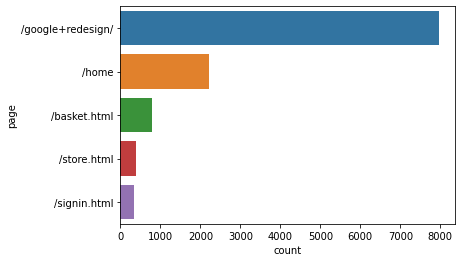

In [49]:
# To avoid a cluttered plot with too much data
numItemsToShow = 5

ax = sns.countplot(data=hitsdf, y="hits_page_pagePathLevel1", order=hitsdf.hits_page_pagePathLevel1.value_counts()[:numItemsToShow].index)
ax.set(ylabel="page", xlabel="count")
plt.show()

Let's join the analytics and hits datasets to explore whether the most viewed page changes based on user device type

In [50]:
mergedDf = pd.merge(left=df, right=hitsdf, left_on="id", right_on="session_id")
mergedDf.head()

,id,date,totals_hits,totals_pageviews,totals_timeOnSite,trafficSource_referralPath,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adContent,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_criteriaParameters,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_isTrueDirect,device_browser,device_browserVersion,device_operatingSystem,device_operatingSystemVersion,device_mobileDeviceModel,device_language,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,fullVisitorId,channelGrouping,socialEngagementType,session_id,hits_hitNumber,hits_time,hits_hour,hits_minute,hits_isInteraction,hits_isEntrance,hits_isExit,hits_referer,hits_page_pagePath,hits_page_hostname,hits_page_pageTitle,hits_page_searchKeyword,hits_page_searchCategory,hits_page_pagePathLevel1,hits_page_pagePathLevel2,hits_page_pagePathLevel3,hits_page_pagePathLevel4,hits_transaction_transactionId,hits_transaction_transactionRevenue,hits_transaction_transactionTax,hits_transaction_transactionShipping,hits_transaction_affiliation,hits_transaction_currencyCode,hits_transaction_localTransactionRevenue,hits_transaction_localTransactionTax,hits_transaction_localTransactionShipping,hits_item_transactionId,hits_item_currencyCode,hits_appInfo_screenName,hits_appInfo_landingScreenName,hits_appInfo_exitScreenName,hits_appInfo_screenDepth,hits_exceptionInfo_isFatal,hits_eventInfo,hits_product,hits_promotion,hits_promotionActionInfo_promoIsView,hits_promotionActionInfo_promoIsClick,hits_eCommerceAction_action_type,hits_eCommerceAction_step,hits_eCommerceAction_option,hits_experiment,hits_customVariables,hits_customDimensions,hits_customMetrics,hits_type,hits_social_socialNetwork,hits_social_hasSocialSourceReferral,hits_social_socialInteractionNetworkAction,hits_latencyTracking,hits_contentGroup_contentGroup1,hits_contentGroup_contentGroup2,hits_contentGroup_contentGroup3,hits_contentGroup_contentGroup4,hits_contentGroup_contentGroup5,hits_contentGroup_previousContentGroup1,hits_contentGroup_previousContentGroup2,hits_contentGroup_previousContentGroup3,hits_contentGroup_previousContentGroup4,hits_contentGroup_previousContentGroup5,hits_contentGroup_contentGroupUniqueViews1,hits_contentGroup_contentGroupUniqueViews2,hits_contentGroup_contentGroupUniqueViews3,hits_dataSource,hits_publisher_infos
0,0,2017-08-01,1,1,NaN,None,(not set),(direct),(none),None,None,None,not available in demo dataset,None,None,None,Chrome,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Caribbean,St. Lucia,(not set),(not set),(not set),not available in demo dataset,unknown.unknown,2.248282e+18,Organic Search,Not Socially Engaged,0,1,0,3,39,True,True,True,http://www.google.com/,/google+redesign/electronics,shop.googlemerchandisestore.com,Electronics | Google Merchandise Store,None,None,/google+redesign/,/electronics,,,None,NaN,NaN,NaN,None,USD,NaN,NaN,NaN,None,USD,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,0,True,None,"[{'productSKU': 'GGOEGBFC018799', 'v2ProductNa...",[],None,None,0,1,None,[],[],[],[],PAGE,(not set),No,:,None,(not set),Electronics,(not set),(not set),(not set),(entrance),(entrance),(entrance),(entrance),(entrance),NaN,1.0,NaN,web,[]
1,1,2017-08-01,1,1,NaN,None,(not set),(direct),(none),None,None,None,not available in demo dataset,None,None,None,Chrome,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),8

In [51]:
print("Rows: ", mergedDf.shape[0])
print("Columns: ", mergedDf.shape[1])

Rows:  13233
Columns:  100


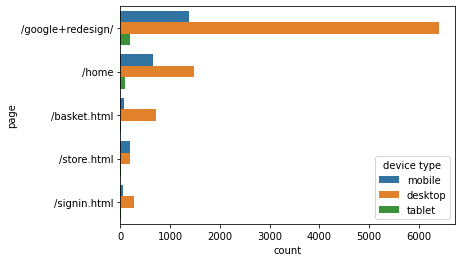

In [52]:
# To avoid a cluttered plot with too much data
numItemsToShow = 5

ax = sns.countplot(data=mergedDf, y="hits_page_pagePathLevel1", order=mergedDf.hits_page_pagePathLevel1.value_counts()[:numItemsToShow].index, hue="device_deviceCategory")
ax.set(ylabel="page", xlabel="count")
plt.legend(title="device type")
plt.show()